# Selección features

## Carga de librerias

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from pprint import pprint

import warnings
warnings.filterwarnings('ignore')
pd.option_context('mode.use_inf_as_na', True)

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OrdinalEncoder

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRFRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor, Pool

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

import joblib
import os


from EDA_function_tools import *
from toolbox_DS import *

## Carga de datos

In [2]:
df = pd.read_csv('./data/df_final_precios_ordenadores.csv', index_col = 0)
df.head(8)

,Company,TypeName,Inches,Ram,OpSys,Weight,Price_euros,Resolution_disc,Pantalla_disc,Family_disc,Clock_speed_disc,Modelo_procesador_disc,Gpu Type,Gpu_Brand_disc,GPU_model_disc,storage_type_disc
id,,,,,,,,,,,,,,,,
268,Dell,Notebook,15.6,8,Windows 10,2.36,749.00,0,1,3,3,3,Dedicated,0,1,1
347,Asus,Notebook,15.6,4,Windows 10,2.00,449.00,0,1,0,0,0,Unknown,1,0,1
353,Toshiba,Notebook,13.3,8,Windows 7,1.20,1460.00,2,1,2,2,2,Unknown,1,2,3
578,Dell,Gaming,15.6,16,Windows 10,4.42,2868.99,6,4,3,4,4,Dedicated,2,7,3
42,Dell,Ultrabook,12.5,8,Windows 7,1.26,1713.37,2,1,2,1,3,Unknown,1,2,3
867,Asus,2 in 1 Convertible,15.6,12,Windows 10,2.26,1099.00,2,1,3,3,3,Dedicated,2,2,3
1136,Asus,Notebook,15.6,4,Linux,2.00,415.00,2,1,1,0,0,Unknown,1,2,3
609,MSI,Gaming,15.6,8,Windows 10,2.40,1142.80,2,1,3,4,4,Dedicated,2,2,3


In [3]:
# Features visuales del EDA anterior copiadas a mano...
features_visual = ['Company',
 'TypeName',
 'Ram',
 'OpSys',
 'Weight',
 'Price_euros',
 'Resolution_disc',
 'Pantalla_disc',
 'Family_disc',
 'Clock_speed_disc',
 'Modelo_procesador_disc',
 'Gpu Type',
 'Gpu_Brand_disc',
 'GPU_model_disc',
 'storage_type_disc']

### Selección de features con ML

Parto de todas las features, convirtiendo las categóricas a numéricas

In [4]:
features_cat = df.select_dtypes(include=('object')).columns.tolist()
features_cat

['Company', 'TypeName', 'OpSys', 'Gpu Type']

Tratamiento de features para todas las variables categóricas

In [5]:
df_engin = pd.get_dummies(df,columns=features_cat, dtype=int)
df_engin.info()

<class 'pandas.core.frame.DataFrame'>
Index: 912 entries, 268 to 1179
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Inches                       912 non-null    float64
 1   Ram                          912 non-null    int64  
 2   Weight                       912 non-null    float64
 3   Price_euros                  912 non-null    float64
 4   Resolution_disc              912 non-null    int64  
 5   Pantalla_disc                912 non-null    int64  
 6   Family_disc                  912 non-null    int64  
 7   Clock_speed_disc             912 non-null    int64  
 8   Modelo_procesador_disc       912 non-null    int64  
 9   Gpu_Brand_disc               912 non-null    int64  
 10  GPU_model_disc               912 non-null    int64  
 11  storage_type_disc            912 non-null    int64  
 12  Company_Acer                 912 non-null    int32  
 13  Company_Apple         

In [6]:
df_engin.columns

Index(['Inches', 'Ram', 'Weight', 'Price_euros', 'Resolution_disc',
       'Pantalla_disc', 'Family_disc', 'Clock_speed_disc',
       'Modelo_procesador_disc', 'Gpu_Brand_disc', 'GPU_model_disc',
       'storage_type_disc', 'Company_Acer', 'Company_Apple', 'Company_Asus',
       'Company_Chuwi', 'Company_Dell', 'Company_Fujitsu', 'Company_Google',
       'Company_HP', 'Company_Huawei', 'Company_LG', 'Company_Lenovo',
       'Company_MSI', 'Company_Mediacom', 'Company_Microsoft', 'Company_Razer',
       'Company_Samsung', 'Company_Toshiba', 'Company_Vero', 'Company_Xiaomi',
       'TypeName_2 in 1 Convertible', 'TypeName_Gaming', 'TypeName_Netbook',
       'TypeName_Notebook', 'TypeName_Ultrabook', 'TypeName_Workstation',
       'OpSys_Android', 'OpSys_Chrome OS', 'OpSys_Linux', 'OpSys_Mac OS X',
       'OpSys_No OS', 'OpSys_Windows 10', 'OpSys_Windows 10 S',
       'OpSys_Windows 7', 'OpSys_macOS', 'Gpu Type_Dedicated',
       'Gpu Type_Unknown'],
      dtype='object')

In [7]:
X_train_engin = df_engin.drop(columns='Price_euros')
y_train_engin = df['Price_euros']
print('X_train_engin', X_train_engin.shape)
print('y_train',y_train_engin.shape)

X_train_engin (912, 47)
y_train (912,)


In [8]:
X_train_engin.columns

Index(['Inches', 'Ram', 'Weight', 'Resolution_disc', 'Pantalla_disc',
       'Family_disc', 'Clock_speed_disc', 'Modelo_procesador_disc',
       'Gpu_Brand_disc', 'GPU_model_disc', 'storage_type_disc', 'Company_Acer',
       'Company_Apple', 'Company_Asus', 'Company_Chuwi', 'Company_Dell',
       'Company_Fujitsu', 'Company_Google', 'Company_HP', 'Company_Huawei',
       'Company_LG', 'Company_Lenovo', 'Company_MSI', 'Company_Mediacom',
       'Company_Microsoft', 'Company_Razer', 'Company_Samsung',
       'Company_Toshiba', 'Company_Vero', 'Company_Xiaomi',
       'TypeName_2 in 1 Convertible', 'TypeName_Gaming', 'TypeName_Netbook',
       'TypeName_Notebook', 'TypeName_Ultrabook', 'TypeName_Workstation',
       'OpSys_Android', 'OpSys_Chrome OS', 'OpSys_Linux', 'OpSys_Mac OS X',
       'OpSys_No OS', 'OpSys_Windows 10', 'OpSys_Windows 10 S',
       'OpSys_Windows 7', 'OpSys_macOS', 'Gpu Type_Dedicated',
       'Gpu Type_Unknown'],
      dtype='object')

#### Selección de features numéricas mediante SelectKBeest y Anova

In [9]:
selector =SelectKBest(f_regression, k = 15)

x_data_kbest = selector.fit_transform(X_train_engin, y_train_engin)

X_train_kBest = pd.DataFrame(x_data_kbest, columns = selector.get_feature_names_out())
X_train_kBest.columns

Index(['Ram', 'Weight', 'Resolution_disc', 'Pantalla_disc', 'Family_disc',
       'Clock_speed_disc', 'Modelo_procesador_disc', 'Gpu_Brand_disc',
       'GPU_model_disc', 'storage_type_disc', 'Company_Razer',
       'TypeName_Gaming', 'TypeName_Notebook', 'TypeName_Ultrabook',
       'TypeName_Workstation'],
      dtype='object')

In [10]:
features_anova = X_train_kBest.columns

#### Selección usando modelo SelectFromModel

In [11]:
rf_selector = RandomForestRegressor(max_depth=5,random_state=42)
rf_selector.fit(X_train_engin, y_train_engin)

RandomForestRegressor(max_depth=5, random_state=42)

In [12]:
rf_selector.feature_importances_[rf_selector.feature_importances_ > rf_selector.feature_importances_.mean()]

array([0.13551082, 0.05690241, 0.02186105, 0.07338741, 0.29499562,
       0.29720384, 0.02174316, 0.03752185, 0.03125898])

In [13]:
# Instanciamos el modelo
selector_model = SelectFromModel(estimator=rf_selector,threshold= 'median')

# Entrenamos
selector_model.fit(X_train_engin,y_train_engin)

SelectFromModel(estimator=RandomForestRegressor(max_depth=5, random_state=42),
                threshold='median')

In [14]:
selector_model.get_feature_names_out()

array(['Inches', 'Ram', 'Weight', 'Resolution_disc', 'Pantalla_disc',
       'Family_disc', 'Clock_speed_disc', 'Modelo_procesador_disc',
       'Gpu_Brand_disc', 'GPU_model_disc', 'storage_type_disc',
       'Company_Asus', 'Company_Dell', 'Company_HP', 'Company_Lenovo',
       'Company_MSI', 'Company_Razer', 'TypeName_Gaming',
       'TypeName_Notebook', 'TypeName_Ultrabook', 'TypeName_Workstation',
       'OpSys_No OS', 'OpSys_Windows 10', 'OpSys_Windows 7'], dtype=object)

In [15]:
features_selector = selector_model.get_feature_names_out()

#### Selección usando RFE

In [16]:
# Instnacio modelo de clasificación
rf_RFE = RandomForestRegressor(max_depth=5,random_state=42)
# Sobre el modelo instancio el rfe
rfe = RFE(
    estimator=rf_RFE,
    n_features_to_select=15,
    step=1
)

# Entreno el modelo rfe
rfe.fit(X_train_engin,y_train_engin)
print(rfe.ranking_)
pd.DataFrame(rfe.ranking_,columns=['ranking'], index=X_train_engin.columns).sort_values('ranking')[:15]

[ 1  1  1  1  1  1  1  1  6  1  1 14 19  1 25  3 26 31  2 30 13  5 10 21
 22  1 23 18 33 32 11  4 17  1 12  1 27 24 15 20  9  7 29  1 28 16  8]


,ranking
Inches,1
TypeName_Notebook,1
TypeName_Workstation,1
Company_Asus,1
OpSys_Windows 7,1
Company_Razer,1
GPU_model_disc,1
storage_type_disc,1
Clock_speed_disc,1
Family_disc,1


In [17]:
temp = pd.DataFrame(rfe.ranking_,columns=['ranking'], index=X_train_engin.columns).sort_values('ranking')[:15]
temp.index[:15]
features_rfe = temp.index[:15]

#### Selección por SFS

In [18]:
# Instancio modelo clasificación
rf_sfs = RandomForestRegressor(max_depth=5,random_state=42)
# Instancio el modelo de la features selection
sfs_fordward = SequentialFeatureSelector(
    rf_sfs,
    n_features_to_select=15,
    cv = 4,
    scoring='neg_mean_absolute_error' 
)

# Entreno el modelo de features_selection
sfs_fordward.fit(X_train_engin,y_train_engin)

SequentialFeatureSelector(cv=4,
                          estimator=RandomForestRegressor(max_depth=5,
                                                          random_state=42),
                          n_features_to_select=15,
                          scoring='neg_mean_absolute_error')

In [19]:
# printar las features seleccionadas
print("Elegidasd SFS:", sfs_fordward.get_feature_names_out())

Elegidasd SFS: ['Ram' 'Weight' 'Pantalla_disc' 'Family_disc' 'Clock_speed_disc'
 'Modelo_procesador_disc' 'GPU_model_disc' 'storage_type_disc'
 'Company_Asus' 'Company_Chuwi' 'Company_Lenovo' 'Company_Razer'
 'Company_Toshiba' 'TypeName_Workstation' 'OpSys_Mac OS X']


In [20]:
features_sfs = sfs_fordward.get_feature_names_out()

#### Seleccion por Hard Voting

In [21]:
listas_features = [features_visual, features_anova, features_selector,features_rfe,features_sfs]
dicc_hard_voting = {}

for col in df.columns:
    count = 0
    for lista in listas_features:
        if col in lista:
            count +=1
    dicc_hard_voting[col]=count
pprint(dicc_hard_voting)

{'Clock_speed_disc': 5,
 'Company': 1,
 'Family_disc': 5,
 'GPU_model_disc': 5,
 'Gpu Type': 1,
 'Gpu_Brand_disc': 3,
 'Inches': 2,
 'Modelo_procesador_disc': 5,
 'OpSys': 1,
 'Pantalla_disc': 5,
 'Price_euros': 1,
 'Ram': 5,
 'Resolution_disc': 4,
 'TypeName': 1,
 'Weight': 5,
 'storage_type_disc': 5}


In [22]:
features_hard_voting = []

for i,j in dicc_hard_voting.items():
    if j == 5 or j == 4:
        features_hard_voting.append(i)
features_hard_voting

['Ram',
 'Weight',
 'Resolution_disc',
 'Pantalla_disc',
 'Family_disc',
 'Clock_speed_disc',
 'Modelo_procesador_disc',
 'GPU_model_disc',
 'storage_type_disc']

#### Prueba mejores modelos con cross_val_score

Instancio modelos

In [11]:
lin_reg = LinearRegression()
rf_model = RandomForestRegressor(max_depth=5, random_state=42)
gb= GradientBoostingRegressor(max_depth=5, random_state=42)
xgb = XGBRFRegressor(max_depth = 5, random_state = 42)
cat = CatBoostRegressor(iterations=100, learning_rate=0.1, depth=6, random_state=42,verbose=0)

In [53]:
# Lista de features
features_list = [features_anova, features_selector,features_rfe,features_sfs,features_hard_voting]
features_list_name = ['ANNOVA', 'SelectFromModel','RFE','SFS','Hard_voting']

# Nombre de los modelos:
model_name = ['LinearRegression','RandomForestregression','GradientBoostingRegressor','XGBoostRegressor','CatBoostRegressor']

# Variables con modelos:
model_list = [lin_reg,rf_model,gb,xgb,cat]

for i,lista in enumerate(features_list):
    for j,modelo in enumerate(model_list):
        score = np.mean(cross_val_score(modelo, X_train_engin[lista], y_train_engin, cv = 5, scoring = 'neg_mean_absolute_error')).round(2)
        print(f'Lista: {features_list_name[i]} y modelo: {model_name[j]}: {score}')
    print()

Lista: ANNOVA y modelo: LinearRegression: -219.37
Lista: ANNOVA y modelo: RandomForestregression: -203.94
Lista: ANNOVA y modelo: GradientBoostingRegressor: -180.04
Lista: ANNOVA y modelo: XGBoostRegressor: -206.02
Lista: ANNOVA y modelo: CatBoostRegressor: -183.34

Lista: SelectFromModel y modelo: LinearRegression: -211.37
Lista: SelectFromModel y modelo: RandomForestregression: -205.22
Lista: SelectFromModel y modelo: GradientBoostingRegressor: -166.48
Lista: SelectFromModel y modelo: XGBoostRegressor: -205.03
Lista: SelectFromModel y modelo: CatBoostRegressor: -171.73

Lista: RFE y modelo: LinearRegression: -219.76
Lista: RFE y modelo: RandomForestregression: -203.88
Lista: RFE y modelo: GradientBoostingRegressor: -173.08
Lista: RFE y modelo: XGBoostRegressor: -205.38
Lista: RFE y modelo: CatBoostRegressor: -177.79

Lista: SFS y modelo: LinearRegression: -227.28
Lista: SFS y modelo: RandomForestregression: -200.84
Lista: SFS y modelo: GradientBoostingRegressor: -177.21
Lista: SFS y 

In [12]:
rf_model.fit(X_train_engin,y_train_engin)

feature_importance = rf_model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Features' : X_train_engin.columns,
    'Importance': feature_importance
})

feature_importance_df=feature_importance_df.sort_values('Importance',ascending=False)

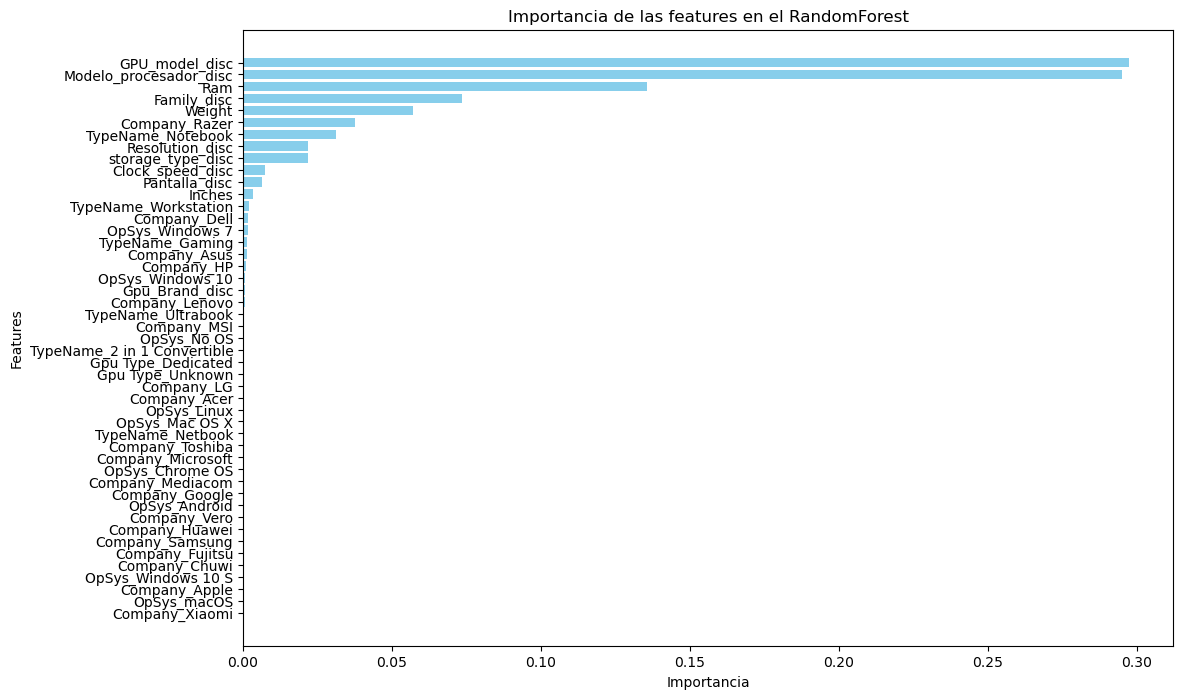

In [26]:
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Features'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importancia')
plt.ylabel('Features')
plt.title('Importancia de las features en el RandomForest')
plt.gca().invert_yaxis()
plt.show()

In [68]:
gb.fit(X_train_engin,y_train_engin)

feature_importance = gb.feature_importances_

feature_importance_df = pd.DataFrame({
    'Features' : X_train_engin.columns,
    'Importance': feature_importance
})

feature_importance_df=feature_importance_df.sort_values('Importance',ascending=False)

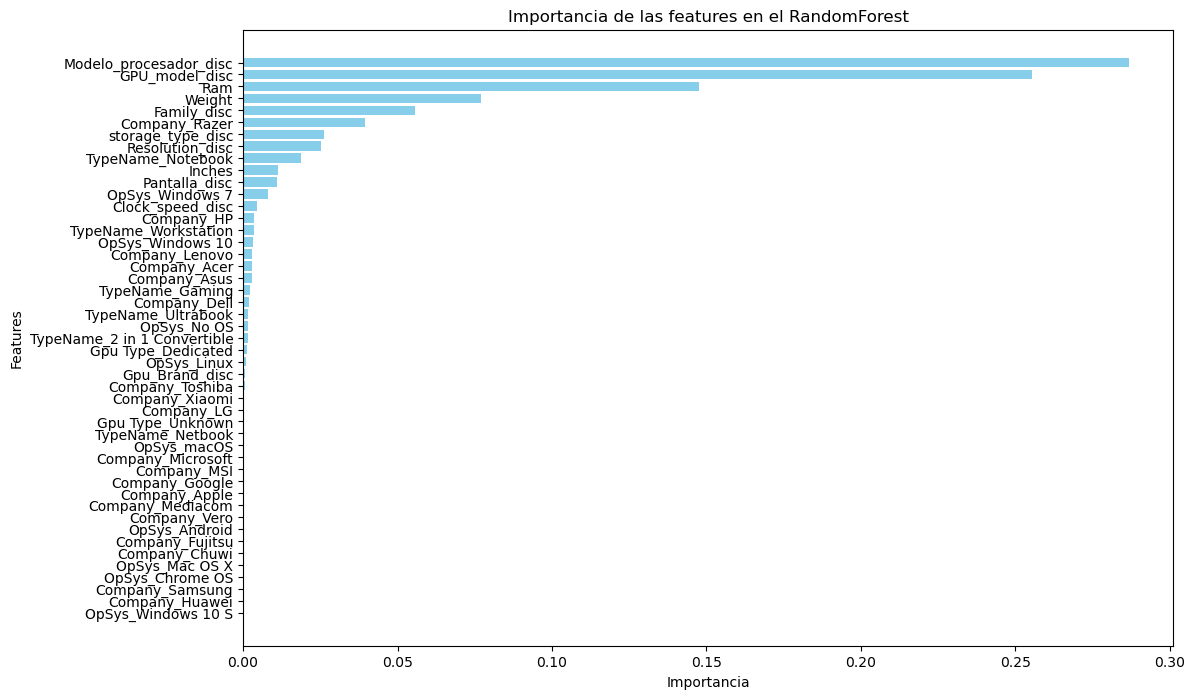

In [69]:
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Features'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importancia')
plt.ylabel('Features')
plt.title('Importancia de las features en el RandomForest')
plt.gca().invert_yaxis()
plt.show()

### Optimización hiperparámetros


Voy a probar 3 modelos:
- GradientBoostingRegressos
- RandomForestRegressor
- XGBoostRegressor

#### Escalado de datos

In [13]:
features_scaled = df_engin.select_dtypes(include=(['int','float'])).columns.tolist()
features_scaled.remove('Price_euros')
print(features_scaled)
scaler = StandardScaler()

temp = scaler.fit_transform(df_engin[features_scaled])
df_scaled = df_engin.copy()
df_scaled[features_scaled] = temp
df_scaled

['Inches', 'Ram', 'Weight', 'Resolution_disc', 'Pantalla_disc', 'Family_disc', 'Clock_speed_disc', 'Modelo_procesador_disc', 'Gpu_Brand_disc', 'GPU_model_disc', 'storage_type_disc', 'Company_Acer', 'Company_Apple', 'Company_Asus', 'Company_Chuwi', 'Company_Dell', 'Company_Fujitsu', 'Company_Google', 'Company_HP', 'Company_Huawei', 'Company_LG', 'Company_Lenovo', 'Company_MSI', 'Company_Mediacom', 'Company_Microsoft', 'Company_Razer', 'Company_Samsung', 'Company_Toshiba', 'Company_Vero', 'Company_Xiaomi', 'TypeName_2 in 1 Convertible', 'TypeName_Gaming', 'TypeName_Netbook', 'TypeName_Notebook', 'TypeName_Ultrabook', 'TypeName_Workstation', 'OpSys_Android', 'OpSys_Chrome OS', 'OpSys_Linux', 'OpSys_Mac OS X', 'OpSys_No OS', 'OpSys_Windows 10', 'OpSys_Windows 10 S', 'OpSys_Windows 7', 'OpSys_macOS', 'Gpu Type_Dedicated', 'Gpu Type_Unknown']


,Inches,Ram,Weight,Price_euros,Resolution_disc,Pantalla_disc,Family_disc,Clock_speed_disc,Modelo_procesador_disc,Gpu_Brand_disc,...,OpSys_Chrome OS,OpSys_Linux,OpSys_Mac OS X,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS,Gpu Type_Dedicated,Gpu Type_Unknown
id,,,,,,,,,,,,,,,,,,,,,
268,0.417157,-0.038512,0.501808,749.00,-1.239669,-0.187796,0.942280,0.731107,0.610169,-1.829683,...,-0.149738,-0.233099,-0.081379,-0.225147,0.47172,-0.066372,-0.190693,-0.110493,1.164727,-1.164727
347,0.417157,-0.855315,-0.049145,449.00,-1.239669,-0.187796,-2.004096,-1.239641,-1.169599,-0.252489,...,-0.149738,-0.233099,-0.081379,-0.225147,0.47172,-0.066372,-0.190693,-0.110493,-0.858570,0.858570
353,-1.212927,-0.038512,-1.273484,1460.00,0.175322,-0.187796,-0.039845,0.074191,0.016913,-0.252489,...,-0.149738,-0.233099,-0.081379,-0.225147,-2.11990,-0.066372,5.244044,-0.110493,-0.858570,0.858570
578,0.417157,1.595095,3.654482,2868.99,3.005305,4.359194,0.942280,1.388023,1.203425,1.324705,...,-0.149738,-0.233099,-0.081379,-0.225147,0.47172,-0.066372,-0.190693,-0.110493,1.164727,-1.164727
42,-1.779913,-0.038512,-1.181659,1713.37,0.175322,-0.187796,-0.039845,-0.582725,0.610169,-0.252489,...,-0.149738,-0.233099,-0.081379,-0.225147,-2.11990,-0.066372,5.244044,-0.110493,-0.858570,0.858570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,-2.417773,-0.855315,-1.196963,389.00,-1.239669,-1.703459,-2.004096,-0.582725,-1.169599,-0.252489,...,6.678323,-0.233099,-0.081379,-0.225147,-2.11990,-0.066372,-0.190693,-0.110493,-0.858570,0.858570
716,-1.212927,-0.855315,-1.273484,1195.00,0.175322,-0.187796,-0.039845,0.074191,0.016913,-0.252489,...,-0.149738,-0.233099,-0.081379,-0.225147,0.47172,-0.066372,-0.190693,-0.110493,-0.858570,0.858570
517,0.417157,-0.038512,0.563025,449.00,-1.239669,-0.187796,-1.021970,-1.239641,-1.169599,-1.829683,...,-0.149738,-0.233099,-0.081379,-0.225147,0.47172,-0.066372,-0.190693,-0.110493,1.164727,-1.164727


Para GBR (escalado)

In [14]:
features_selector=['Inches', 'Ram', 'Weight', 'Resolution_disc', 'Pantalla_disc',
       'Family_disc', 'Clock_speed_disc', 'Modelo_procesador_disc',
       'Gpu_Brand_disc', 'GPU_model_disc', 'storage_type_disc',
       'Company_Asus', 'Company_Dell', 'Company_HP', 'Company_Lenovo',
       'Company_MSI', 'Company_Razer', 'TypeName_Gaming',
       'TypeName_Notebook', 'TypeName_Ultrabook', 'TypeName_Workstation',
       'OpSys_No OS', 'OpSys_Windows 10', 'OpSys_Windows 7']

In [19]:
X_train_model = df_scaled[features_selector]

param_grid_gb_reg = {
    'n_estimators': [189,190, 191],
    'max_depth': [4,5,6],
    'learning_rate': [0.09,0.1,0.2],
    'subsample': [0.5, 0.6,0.7]
    
}

gbr_grid = GridSearchCV(estimator=gb,
                     param_grid=param_grid_gb_reg, 
                     scoring='neg_mean_absolute_error', 
                     cv=5, 
                     n_jobs=-1)

gbr_grid.fit(X_train_model, y_train_engin)

GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(max_depth=5, random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.09, 0.1, 0.2],
                         'max_depth': [4, 5, 6],
                         'n_estimators': [189, 190, 191],
                         'subsample': [0.5, 0.6, 0.7]},
             scoring='neg_mean_absolute_error')

In [20]:
best_model_gb_reg = gbr_grid.best_estimator_
best_params_gb_reg = gbr_grid.best_params_
best_score_gb_reg = gbr_grid.best_score_

print(f'Best Parameters for Regression: {best_params_gb_reg}')
print(f'Best Score for Regression: {best_score_gb_reg}')


Best Parameters for Regression: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 189, 'subsample': 0.6}
Best Score for Regression: -161.3780969287688


Para RandomForest

In [30]:
X_train_model = df_engin[features_sfs]

param_grid = {
    'n_estimators': [200, 300,400],
    'criterion': ['absolute_error'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 5],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

rf_model_grid = GridSearchCV(estimator=rf_model,
							   param_grid=param_grid,
							   scoring='neg_mean_absolute_error',
							   cv=5,
							   n_jobs=-1)

rf_model_grid.fit(X_train_model, y_train_engin)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_depth=5, random_state=42),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['absolute_error'],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 10, 20],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_absolute_error')

In [31]:
best_model_clf = rf_model_grid.best_estimator_
best_params_clf = rf_model_grid.best_params_
best_score_clf = rf_model_grid.best_score_

print(f'Best Parameters for Classification: {best_params_clf}')
print(f'Best Score for Classification: {best_score_clf}')

Best Parameters for Classification: {'bootstrap': True, 'criterion': 'absolute_error', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Score for Classification: -178.02339398476755


Para XGB


In [32]:
X_train_model = df_engin[features_sfs]

param_grid_xgb_reg = {
    'n_estimators': [100, 200],
    'learning_rate': [0.1, 0.2, 0.4, 0.6],
    'max_depth': [5, 7, 9 ,11],
    'subsample': [0.8, 1.0, 1.2,1.4],
    'colsample_bytree': [1.0, 1.2, 1.4],
    'gamma': [0, 0.1],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [1, 1.5, 2]
}

xgb_grid = GridSearchCV(estimator=xgb, 
                        param_grid=param_grid_xgb_reg, 
                        scoring='neg_mean_absolute_error', 
                        cv=5, 
                        n_jobs=-1)

xgb_grid.fit(X_train_model, y_train_engin)

GridSearchCV(cv=5,
             estimator=XGBRFRegressor(base_score=None, booster=None,
                                      callbacks=None, colsample_bylevel=None,
                                      colsample_bytree=None, device=None,
                                      early_stopping_rounds=None,
                                      enable_categorical=False,
                                      eval_metric=None, feature_types=None,
                                      gamma=None, grow_policy=None,
                                      importance_type=None,
                                      interaction_constraints=None,
                                      max_bin=None, max_cat_threshold=None,
                                      max_...
                                      n_jobs=None, num_parallel_tree=None,
                                      objective='reg:squarederror',
                                      random_state=42, reg_alpha=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [1.0, 1.2, 1.4], 'gamma': [0, 0.1],
                         'learning_rate': [0.1, 0.2, 0.4, 0.6],
                         'max_depth': [5, 7, 9, 11], 'n_estimators': [100, 200],
                         'reg_alpha': [0, 0.01, 0.1], 'reg_lambda': [1, 1.5, 2],
                         'subsample': [0.8, 1.0, 1.2, 1.4]},
             scoring='neg_mean_absolute_error')

In [33]:
# Obtener el mejor modelo y sus parámetros
best_model_xgb_grid = xgb_grid.best_estimator_
best_params_xgb_grid = xgb_grid.best_params_
best_score_xgb_grid = xgb_grid.best_score_

In [34]:
print(f'Best Parameters for Regression: {best_params_xgb_grid}')
print(f'Best Score for Regression: {best_score_xgb_grid}')

Best Parameters for Regression: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.6, 'max_depth': 11, 'n_estimators': 200, 'reg_alpha': 0.1, 'reg_lambda': 1, 'subsample': 1.0}
Best Score for Regression: -287.7560267552498


Para CatBoostRegressor

In [55]:

X_train_model = df_scaled[features_selector]

param_grid = {
    'depth': [4, 6, 8],
    'learning_rate': [0.03, 0.1, 0.3],
    'iterations': [500, 1000, 1500]
}

# Instanciamos GridSearchCV
grid_search_scaled = GridSearchCV(estimator=cat,
                           param_grid=param_grid,
                           scoring='neg_mean_absolute_error',
                           cv=5,
                           verbose=0)

# Ejecutamos el ajuste de hiperparámetros
grid_search_scaled.fit(X_train_model, y_train_engin)

# Imprimimos los mejores parámetros encontrados
print(f'Mejores hiperparámetros: {grid_search_scaled.best_params_}')
print(f'Mejor MAE: {-grid_search_scaled.best_score_}')

Mejores hiperparámetros: {'depth': 6, 'iterations': 1500, 'learning_rate': 0.03}
Mejor MSE: 158.12189513577493


In [61]:

X_train_model = df_engin[features_selector]

param_grid = {
    'depth': [5, 6, 7],
    'learning_rate': [0.01, 0.03,0.05],
    'iterations': [1400,1500,1600]
}

# Instanciamos GridSearchCV
cat_grid = GridSearchCV(estimator=cat,
                           param_grid=param_grid,
                           scoring='neg_mean_absolute_error',
                           cv=5,
                           verbose=0)

# Ejecutamos el ajuste de hiperparámetros
cat_grid.fit(X_train_model, y_train_engin)

# Imprimimos los mejores parámetros encontrados
print(f'Mejores hiperparámetros: {cat_grid.best_params_}')
print(f'Mejor MAE: {cat_grid.best_score_}')

Mejores hiperparámetros: {'depth': 7, 'iterations': 1400, 'learning_rate': 0.05}
Mejor MAE: -157.00436438648416


In [56]:
import joblib
import os

model_path = os.path.join('models', 'rf_model_grid.pkl')
joblib.dump(rf_model_grid, model_path)

['models\\rf_model_grid.pkl']

In [23]:
import joblib
import os
model_path = os.path.join('models', 'gbr_grid_opt.pkl')
joblib.dump(gbr_grid, model_path)

['models\\gbr_grid_opt.pkl']

In [58]:
model_path = os.path.join('models', 'grid_search.pkl')
joblib.dump(grid_search, model_path)

['models\\grid_search.pkl']

In [62]:
model_path = os.path.join('models', 'cat_grid.pkl')
joblib.dump(cat_grid, model_path)

['models\\cat_grid.pkl']

______

Voy a probar con la regresión lineal una vez escalado los datos

In [37]:
X_train_model = df_scaled[features_sfs]

lin_reg_grid = LinearRegression()

lin_reg_grid.fit(X_train_model, y_train_engin)

LinearRegression()

In [38]:
from sklearn import linear_model, metrics, model_selection

y_pred = lin_reg_grid.predict(X_train_model)

print("Train MAE:", metrics.mean_absolute_error(y_train_engin, y_pred))

Train MAE: 222.33621371947254


In [39]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha = 0.1, l1_ratio = 0.5)
elastic_net.fit(X_train_model, y_train_engin)

print("Train MAE: %0.4f" % metrics.mean_absolute_error(y_train_engin, elastic_net.predict(X_train_model)))

Train MAE: 221.5996


Pues nada, dado que GradientBoost y XGBoost no me funcionan correctamente, solo me queda RandomForest. La regresión loogística para este caso no funciona tan bien.

____ 

Voy a probar el RandomForest con las variables escaladas

In [40]:
X_train_model = df_scaled.drop(columns='Price_euros')

param_grid = {
    'n_estimators': [100, 200, 300],
    'criterion': ['absolute_error'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

rf_model_grid = GridSearchCV(estimator=rf_model,
							   param_grid=param_grid,
							   scoring='neg_mean_absolute_error',
							   cv=5,
							   n_jobs=-1)

rf_model_grid.fit(X_train_model, y_train_engin)
best_model_clf = rf_model_grid.best_estimator_
best_params_clf = rf_model_grid.best_params_
best_score_clf = rf_model_grid.best_score_

print(f'Best Parameters for Classification: {best_params_clf}')
print(f'Best Score for Classification: {best_score_clf}')

KeyboardInterrupt: 

___

## Hago un cambio en el número de features a tener en cuenta en el proceso de selección

### Selección de features con ML

Parto de todas las features, convirtiendo las categóricas a numéricas

#### Selección de features numéricas mediante SelectKBeest y Anova

In [70]:
selector =SelectKBest(f_regression, k = 20)

x_data_kbest = selector.fit_transform(X_train_engin, y_train_engin)

X_train_kBest = pd.DataFrame(x_data_kbest, columns = selector.get_feature_names_out())
X_train_kBest.columns

Index(['Ram', 'Weight', 'Resolution_disc', 'Pantalla_disc', 'Family_disc',
       'Clock_speed_disc', 'Modelo_procesador_disc', 'Gpu_Brand_disc',
       'GPU_model_disc', 'storage_type_disc', 'Company_Acer', 'Company_MSI',
       'Company_Razer', 'TypeName_Gaming', 'TypeName_Notebook',
       'TypeName_Ultrabook', 'TypeName_Workstation', 'OpSys_No OS',
       'Gpu Type_Dedicated', 'Gpu Type_Unknown'],
      dtype='object')

In [71]:
features_anova_plus = X_train_kBest.columns

#### Selección usando modelo SelectFromModel

In [72]:
rf_selector = RandomForestRegressor(max_depth=5,random_state=42)
rf_selector.fit(X_train_engin, y_train_engin)

RandomForestRegressor(max_depth=5, random_state=42)

In [74]:
rf_selector.feature_importances_[rf_selector.feature_importances_ > rf_selector.feature_importances_.mean()]

array([0.13551082, 0.05690241, 0.02186105, 0.07338741, 0.29499562,
       0.29720384, 0.02174316, 0.03752185, 0.03125898])

In [75]:
# Instanciamos el modelo
selector_model = SelectFromModel(estimator=rf_selector,threshold= 'median')

# Entrenamos
selector_model.fit(X_train_engin,y_train_engin)

SelectFromModel(estimator=RandomForestRegressor(max_depth=5, random_state=42),
                threshold='median')

In [76]:
selector_model.get_feature_names_out()

array(['Inches', 'Ram', 'Weight', 'Resolution_disc', 'Pantalla_disc',
       'Family_disc', 'Clock_speed_disc', 'Modelo_procesador_disc',
       'Gpu_Brand_disc', 'GPU_model_disc', 'storage_type_disc',
       'Company_Asus', 'Company_Dell', 'Company_HP', 'Company_Lenovo',
       'Company_MSI', 'Company_Razer', 'TypeName_Gaming',
       'TypeName_Notebook', 'TypeName_Ultrabook', 'TypeName_Workstation',
       'OpSys_No OS', 'OpSys_Windows 10', 'OpSys_Windows 7'], dtype=object)

In [77]:
features_selector_plus = selector_model.get_feature_names_out()

#### Selección usando RFE

In [78]:
# Instnacio modelo de clasificación
rf_RFE = RandomForestRegressor(max_depth=5,random_state=42)
# Sobre el modelo instancio el rfe
rfe = RFE(
    estimator=rf_RFE,
    n_features_to_select=20,
    step=1
)

# Entreno el modelo rfe
rfe.fit(X_train_engin,y_train_engin)
print(rfe.ranking_)
pd.DataFrame(rfe.ranking_,columns=['ranking'], index=X_train_engin.columns).sort_values('ranking')[:20]

[ 1  1  1  1  1  1  1  1  1  1  1  9 14  1 20  1 21 26  1 25  8  1  5 16
 17  1 18 13 28 27  6  1 12  1  7  1 22 19 10 15  4  2 24  1 23 11  3]


,ranking
Inches,1
Company_HP,1
TypeName_Gaming,1
TypeName_Notebook,1
Company_Dell,1
TypeName_Workstation,1
Company_Asus,1
OpSys_Windows 7,1
Company_Razer,1
storage_type_disc,1


In [80]:
temp = pd.DataFrame(rfe.ranking_,columns=['ranking'], index=X_train_engin.columns).sort_values('ranking')[:20]
temp.index[:20]
features_rfe_plus = temp.index[:20]

#### Selección por SFS

In [81]:
# Instancio modelo clasificación
rf_sfs = RandomForestRegressor(max_depth=5,random_state=42)
# Instancio el modelo de la features selection
sfs_fordward = SequentialFeatureSelector(
    rf_sfs,
    n_features_to_select=20,
    cv = 4,
    scoring='neg_mean_absolute_error' 
)

# Entreno el modelo de features_selection
sfs_fordward.fit(X_train_engin,y_train_engin)

SequentialFeatureSelector(cv=4,
                          estimator=RandomForestRegressor(max_depth=5,
                                                          random_state=42),
                          n_features_to_select=20,
                          scoring='neg_mean_absolute_error')

In [82]:
# printar las features seleccionadas
print("Elegidasd SFS:", sfs_fordward.get_feature_names_out())

Elegidasd SFS: ['Ram' 'Weight' 'Pantalla_disc' 'Family_disc' 'Clock_speed_disc'
 'Modelo_procesador_disc' 'GPU_model_disc' 'storage_type_disc'
 'Company_Asus' 'Company_Chuwi' 'Company_HP' 'Company_Huawei'
 'Company_Lenovo' 'Company_Microsoft' 'Company_Razer' 'Company_Toshiba'
 'Company_Vero' 'TypeName_Workstation' 'OpSys_Linux' 'OpSys_Mac OS X']


In [83]:
features_sfs_plus = sfs_fordward.get_feature_names_out()

#### Seleccion por Hard Voting

In [84]:
listas_features = [features_visual, features_anova, features_selector,features_rfe,features_sfs]
dicc_hard_voting = {}

for col in df.columns:
    count = 0
    for lista in listas_features:
        if col in lista:
            count +=1
    dicc_hard_voting[col]=count
pprint(dicc_hard_voting)

{'Clock_speed_disc': 5,
 'Company': 1,
 'Family_disc': 5,
 'GPU_model_disc': 5,
 'Gpu Type': 1,
 'Gpu_Brand_disc': 4,
 'Inches': 2,
 'Modelo_procesador_disc': 5,
 'OpSys': 1,
 'Pantalla_disc': 5,
 'Price_euros': 1,
 'Ram': 5,
 'Resolution_disc': 4,
 'TypeName': 1,
 'Weight': 5,
 'storage_type_disc': 5}


In [86]:
features_hard_voting_plus = []

for i,j in dicc_hard_voting.items():
    if j == 5 or j == 4:
        features_hard_voting_plus.append(i)
features_hard_voting_plus

['Ram',
 'Weight',
 'Resolution_disc',
 'Pantalla_disc',
 'Family_disc',
 'Clock_speed_disc',
 'Modelo_procesador_disc',
 'Gpu_Brand_disc',
 'GPU_model_disc',
 'storage_type_disc']

#### Prueba mejores modelos con cross_val_score

Instancio modelos

In [87]:
lin_reg = LinearRegression()
rf_model = RandomForestRegressor(max_depth=5, random_state=42)
gb= GradientBoostingRegressor(max_depth=5, random_state=42)
xgb = XGBRFRegressor(max_depth = 5, random_state = 42)
cat = CatBoostRegressor(depth=6, random_state=42,verbose=0)

In [88]:
# Lista de features
features_list = [features_anova_plus, features_selector_plus,features_rfe_plus,features_sfs_plus,features_hard_voting_plus]
features_list_name = ['ANNOVA', 'SelectFromModel','RFE','SFS','Hard_voting']

# Nombre de los modelos:
model_name = ['LinearRegression','RandomForestregression','GradientBoostingRegressor','XGBoostRegressor','CatBoostRegressor']

# Variables con modelos:
model_list = [lin_reg,rf_model,gb,xgb,cat]

for i,lista in enumerate(features_list):
    for j,modelo in enumerate(model_list):
        score = np.mean(cross_val_score(modelo, X_train_engin[lista], y_train_engin, cv = 5, scoring = 'neg_mean_absolute_error')).round(2)
        print(f'Lista: {features_list_name[i]} y modelo: {model_name[j]}: {score}')
    print()

Lista: ANNOVA y modelo: LinearRegression: -215.72
Lista: ANNOVA y modelo: RandomForestregression: -203.74
Lista: ANNOVA y modelo: GradientBoostingRegressor: -176.87
Lista: ANNOVA y modelo: XGBoostRegressor: -203.68
Lista: ANNOVA y modelo: CatBoostRegressor: -166.23

Lista: SelectFromModel y modelo: LinearRegression: -211.37
Lista: SelectFromModel y modelo: RandomForestregression: -205.22
Lista: SelectFromModel y modelo: GradientBoostingRegressor: -166.48
Lista: SelectFromModel y modelo: XGBoostRegressor: -205.03
Lista: SelectFromModel y modelo: CatBoostRegressor: -158.22

Lista: RFE y modelo: LinearRegression: -217.03
Lista: RFE y modelo: RandomForestregression: -204.42
Lista: RFE y modelo: GradientBoostingRegressor: -172.77
Lista: RFE y modelo: XGBoostRegressor: -209.9
Lista: RFE y modelo: CatBoostRegressor: -162.62

Lista: SFS y modelo: LinearRegression: -228.21
Lista: SFS y modelo: RandomForestregression: -201.2
Lista: SFS y modelo: GradientBoostingRegressor: -175.13
Lista: SFS y mo